### Tpot cue prediction

In [1]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/Users/Ralf/My_Cloud/03_PROJEKTE/CUES/Matlab')

#### Set up train and test datasets

In [2]:
X_train = pd.read_csv('setA_001-120.txt', delimiter='\t')
y_train = X_train['Risk']

#y_train = shuffle(y_train)
X_train = X_train.drop([   'BildNr','No','Sex','Trust','Health','Attractiveness','Risk',
                           ' CUE3_Appearance3_Unshaved (vs. shaved)_Abstract_0',
                           ' CUE34_Face17_Strong (vs. no) growth of beard_Abstract_0',
                           ' CUE53_Mouth2_Yellow (vs. white) teeth_Abstract_0',
                           ' CUE62_Set8_Dark (vs. well-lit) background_Abstract_0',
                           ' CUE35_GenImp1_Self confident (vs. not)_Abstract_2',
                           ' CUE36_GenImp2_Cautious (vs. risk-seeking)_Abstract_2',
                           ' CUE37_GenImp3_Uneducated (vs. educated)_Abstract_2',
                           ' CUE38_GenImp4_Southern (vs. nordic) type_Abstract_1',
                           ' CUE39_GenImp5_Sporty (vs. unsporty)_Abstract_2',
                           ' CUE40_GenImp6_Scruffy (vs. kempt)_Abstract_2',
                           ' CUE41_GenImp7_Likeable (vs. unsympathetic)_Abstract_2',
                           ' CUE42_GenImp8_Attractive (vs. unattractive)_Abstract_2',
                           ' CUE43_GenImp9_Irresponsible (vs. responsible)_Abstract_2',
                           ' CUE44_GenImp10_Homosexual (vs. heterosexual)_Abstract_2',
                           ' CUE45_GenImp11_Popular (vs. unpopular)_Abstract_2',
                           ' CUE46_GenImp12_Selfish (vs. unselfish)_Abstract_2',
                           ' CUE47_GenImp13_Ill-looking (vs. healthy-looking)_Abstract_2'], axis=1)

X_test = pd.read_csv('setB_121-240.txt', delimiter='\t')
y_test = X_test['Risk']
X_test = X_test.drop([ 'BildNr','No','Sex','Trust','Health','Attractiveness','Risk',
                           ' CUE3_Appearance3_Unshaved (vs. shaved)_Abstract_0',
                           ' CUE34_Face17_Strong (vs. no) growth of beard_Abstract_0',
                           ' CUE53_Mouth2_Yellow (vs. white) teeth_Abstract_0',
                           ' CUE62_Set8_Dark (vs. well-lit) background_Abstract_0',
                           ' CUE35_GenImp1_Self confident (vs. not)_Abstract_2',
                           ' CUE36_GenImp2_Cautious (vs. risk-seeking)_Abstract_2',
                           ' CUE37_GenImp3_Uneducated (vs. educated)_Abstract_2',
                           ' CUE38_GenImp4_Southern (vs. nordic) type_Abstract_1',
                           ' CUE39_GenImp5_Sporty (vs. unsporty)_Abstract_2',
                           ' CUE40_GenImp6_Scruffy (vs. kempt)_Abstract_2',
                           ' CUE41_GenImp7_Likeable (vs. unsympathetic)_Abstract_2',
                           ' CUE42_GenImp8_Attractive (vs. unattractive)_Abstract_2',
                           ' CUE43_GenImp9_Irresponsible (vs. responsible)_Abstract_2',
                           ' CUE44_GenImp10_Homosexual (vs. heterosexual)_Abstract_2',
                           ' CUE45_GenImp11_Popular (vs. unpopular)_Abstract_2',
                           ' CUE46_GenImp12_Selfish (vs. unselfish)_Abstract_2',
                           ' CUE47_GenImp13_Ill-looking (vs. healthy-looking)_Abstract_2'], axis=1)
y_train.tail()
#yourdf.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)
X_train.isnull().values.any()

#y_train = pd.DataFrame(np.random.rand(120))
y_train.values.shape


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 56), (120, 56), (120,), (120,))

#### Run TPot to test numerous pipelines and select the best one...

In [4]:
tpot = TPOTRegressor(generations=2, #population_size=5, 
                     verbosity=2)#,
                     # config_dict='TPOT light')
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
tpot.export('tpot_cues_pipeline.py')
print(tpot.score(X_test, y_test))


Optimization Progress:  67%|██████▋   | 200/300 [02:37<01:21,  1.23pipeline/s]

Generation 1 - Current best internal CV score: 0.338614456442


Generation 2 - Current best internal CV score: 0.326314181244



Best pipeline: LinearSVR(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.95, min_samples_leaf=4, min_samples_split=11, n_estimators=100), C=0.01, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=1e-05)
0.175059687127


True

#### This is the generated pipeline code

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator


exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.95, min_samples_leaf=4, min_samples_split=11, n_estimators=100)),
    LinearSVR(C=0.01, dual=True, epsilon=0.01, loss="epsilon_insensitive", tol=1e-05)
)

exported_pipeline.fit(X_train, y_train)
y_pred_rf = exported_pipeline.predict(X_test)
y_pred_rf.shape

(120,)

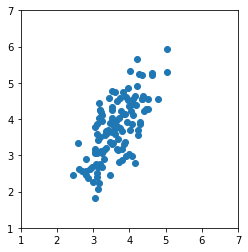

0.699400407342


0.4727129736242921

In [4]:
plt.scatter(y_pred_rf, y_test);
plt.axis('square')
plt.xlim([1,7])
plt.ylim([1,7])

plt.show()
print(np.corrcoef(y_pred_rf, y_test)[0,1])


from sklearn.metrics import r2_score
r2_score_rf = r2_score(y_test, y_pred_rf)
r2_score_rf

In [5]:
### another model would be elastic net

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer

enet =  ElasticNet(alpha=0.24, l1_ratio=0.05)

enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)
y_pred_enet.shape

(120,)

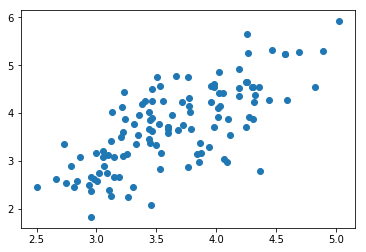

0.726935524368


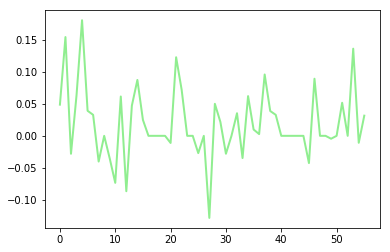

In [7]:
plt.scatter(y_pred_enet, y_test);
plt.show()
print(np.corrcoef(y_pred_enet, y_test)[0,1])


from sklearn.metrics import r2_score
r2_score_enet = r2_score(y_test, y_pred_enet)
r2_score_enet

np.sqrt(r2_score_enet)
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')